In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Helper function for creating age groups from 'yr_built'
def create_age_group(row):
    year = row['yr_built']
    # Four groups based on year built
    if year >= 2000:
        return 4
    elif 1980 <= year < 2000:
        return 3
    elif 1960 <= year < 1980:
        return 2
    else:
        return 1

In [3]:
# load a csv-file into a DataFrame
# dataset explanations: 
# https://www.kaggle.com/arathipraj/house-data
df = pd.read_csv('houses.csv')

In [4]:
# Define year groups and apply helper function
df['age_group'] = df.apply(create_age_group, axis=1)
df = df.drop("yr_built", axis=1)

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age_group
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,0,98028,47.7379,-122.233,2720,8062,1
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,0,98136,47.5208,-122.393,1360,5000,2
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,0,98074,47.6168,-122.045,1800,7503,3


In [6]:
# Remove obvious columns not needed
df = df.drop(['id', 'zipcode', 'lat', 'long'], axis=1)

In [7]:
# Convert date to DateTime -object
df['DateTime'] = pd.to_datetime(df['date'])

In [8]:
# Get year and month as intergers
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month

In [9]:
# Drop original timestamp and temporary
df = df.drop(['DateTime', 'date'], axis=1)

In [10]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,age_group,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,1340,5650,1,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,1690,7639,1,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,2720,8062,1,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,1360,5000,2,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,1800,7503,3,2015,2


In [11]:
# Check correlations
df.corr(numeric_only=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,age_group,year,month
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.126434,0.585379,0.082447,0.100829,0.003576,-0.010081
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.018841,0.391638,0.029244,0.143535,-0.009838,-0.001533
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.050739,0.568634,0.087175,0.540457,-0.026596,0.007392
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.055363,0.756420,0.183286,0.335296,-0.029038,0.011810
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.007644,0.144608,0.718557,0.040027,0.005468,-0.002369
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.006338,0.279885,-0.011269,0.604650,-0.022315,0.014005
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.092885,0.086463,0.030703,-0.028279,-0.004165,0.008132
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.103917,0.280439,0.072575,-0.058893,0.001364,-0.005638
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.060618,-0.092824,-0.003406,-0.381127,-0.045589,0.021978
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.014414,0.713202,0.119248,0.463821,-0.030387,0.008376


In [12]:
# It seems that data is not balanced when it comes to year, most sales are from 2014
df['year'].value_counts()

year
2014    14633
2015     6980
Name: count, dtype: int64

In [13]:
# Check which are in squere feet
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15',
       'age_group', 'year', 'month'],
      dtype='object')

In [14]:
# Create new column for measurement in m2
df['living_m2'] = df['sqft_living'] * 0.09290304
df['lot_m2'] = df['sqft_lot'] * 0.09290304
df['above_m2'] = df['sqft_above'] * 0.09290304
df['basement_m2'] = df['sqft_basement'] * 0.09290304
df['living_m2_15'] = df['sqft_living15'] * 0.09290304
df['lot_m2_15'] = df['sqft_lot15'] * 0.09290304

In [15]:
# Drop original squere feet columns
df = df.drop(["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15", "view", "condition"], axis=1)

In [16]:
df.head()

,price,bedrooms,bathrooms,floors,waterfront,grade,yr_renovated,age_group,year,month,living_m2,lot_m2,above_m2,basement_m2,living_m2_15,lot_m2_15
0,221900.0,3,1.00,1.0,0,7,0,1,2014,10,109.625587,524.902176,109.625587,0.000000,124.490074,524.902176
1,538000.0,3,2.25,2.0,0,7,1991,1,2014,12,238.760813,672.803816,201.599597,37.161216,157.006138,709.686323
2,180000.0,2,1.00,1.0,0,6,0,1,2015,2,71.535341,929.030400,71.535341,0.000000,252.696269,748.984308
3,604000.0,4,3.00,1.0,0,7,0,2,2014,12,182.089958,464.515200,97.548192,84.541766,126.348134,464.515200
4,510000.0,3,2.00,1.0,0,8,0,3,2015,2,156.077107,750.656563,156.077107,0.000000,167.225472,697.051509


In [17]:
df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [18]:
# yr_renovated is tricky
# most of it 0 => probably never renovated, or data not available

# options:
# drop yr_renovated
# if yr_renovated is 0 => replace yr_renovated
# also drop columns for easier plotting
df = df.drop(["yr_renovated", "waterfront", "year", "month", "lot_m2", "above_m2", "basement_m2", "living_m2_15", "lot_m2_15"], axis=1)

In [19]:
df

,price,bedrooms,bathrooms,floors,grade,age_group,living_m2
0,221900.0,3,1.00,1.0,7,1,109.625587
1,538000.0,3,2.25,2.0,7,1,238.760813
2,180000.0,2,1.00,1.0,6,1,71.535341
3,604000.0,4,3.00,1.0,7,2,182.089958
4,510000.0,3,2.00,1.0,8,3,156.077107
...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,3.0,8,4,142.141651
21609,400000.0,4,2.50,2.0,8,4,214.606022
21610,402101.0,2,0.75,2.0,7,4,94.761101
21611,400000.0,3,2.50,2.0,8,4,148.644864


<Axes: >

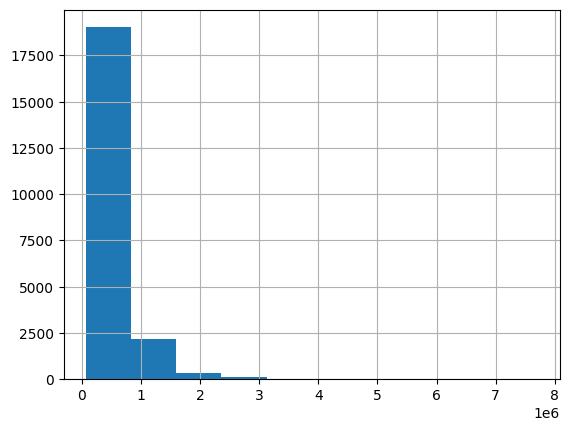

In [20]:
# Check price distribution
df['price'].hist()

In [21]:
# Quick and dirty way to remove all extreme values (outliers)
# Uses normal distribution, all values under -3 and +3 are removed
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

<Axes: >

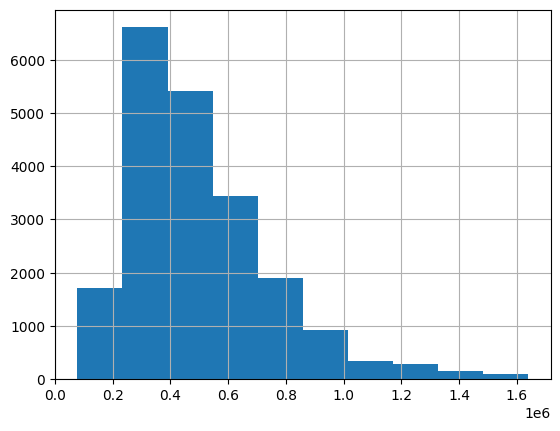

In [22]:
# Check distribution again
df['price'].hist()

In [23]:
# Seems we have lots of outliers, normal distribution lost 2000 apartments from data
df.describe()

,price,bedrooms,bathrooms,floors,grade,age_group,living_m2
count,2.089900e+04,20899.000000,20899.000000,20899.000000,20899.000000,20899.000000,20899.000000
mean,5.009864e+05,3.334227,2.065589,1.481937,7.584143,2.295804,186.128398
std,2.510289e+05,0.857723,0.702334,0.536804,1.068628,1.152488,72.786078
min,7.800000e+04,1.000000,0.000000,1.000000,5.000000,1.000000,34.374125
25%,3.199000e+05,3.000000,1.500000,1.000000,7.000000,1.000000,130.993286
50%,4.450000e+05,3.000000,2.250000,1.000000,7.000000,2.000000,174.657715
75%,6.230000e+05,4.000000,2.500000,2.000000,8.000000,3.000000,230.399539
max,1.640000e+06,6.000000,4.250000,3.000000,11.000000,4.000000,445.934592


<Axes: >

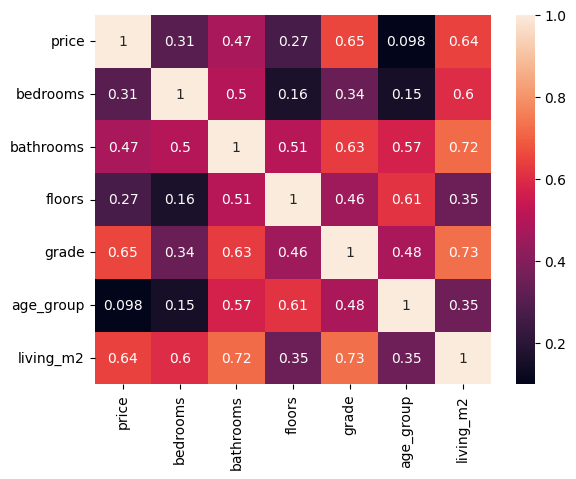

In [24]:
# Visualize correlation matrix using seaborn
correlations = df.corr(numeric_only=True)
sns.heatmap(correlations, annot=True)

**For easier and faster plotting, take sample based on normal dirtribution.**

In [25]:
# Sample of 3000
sample = df.sample(3000)

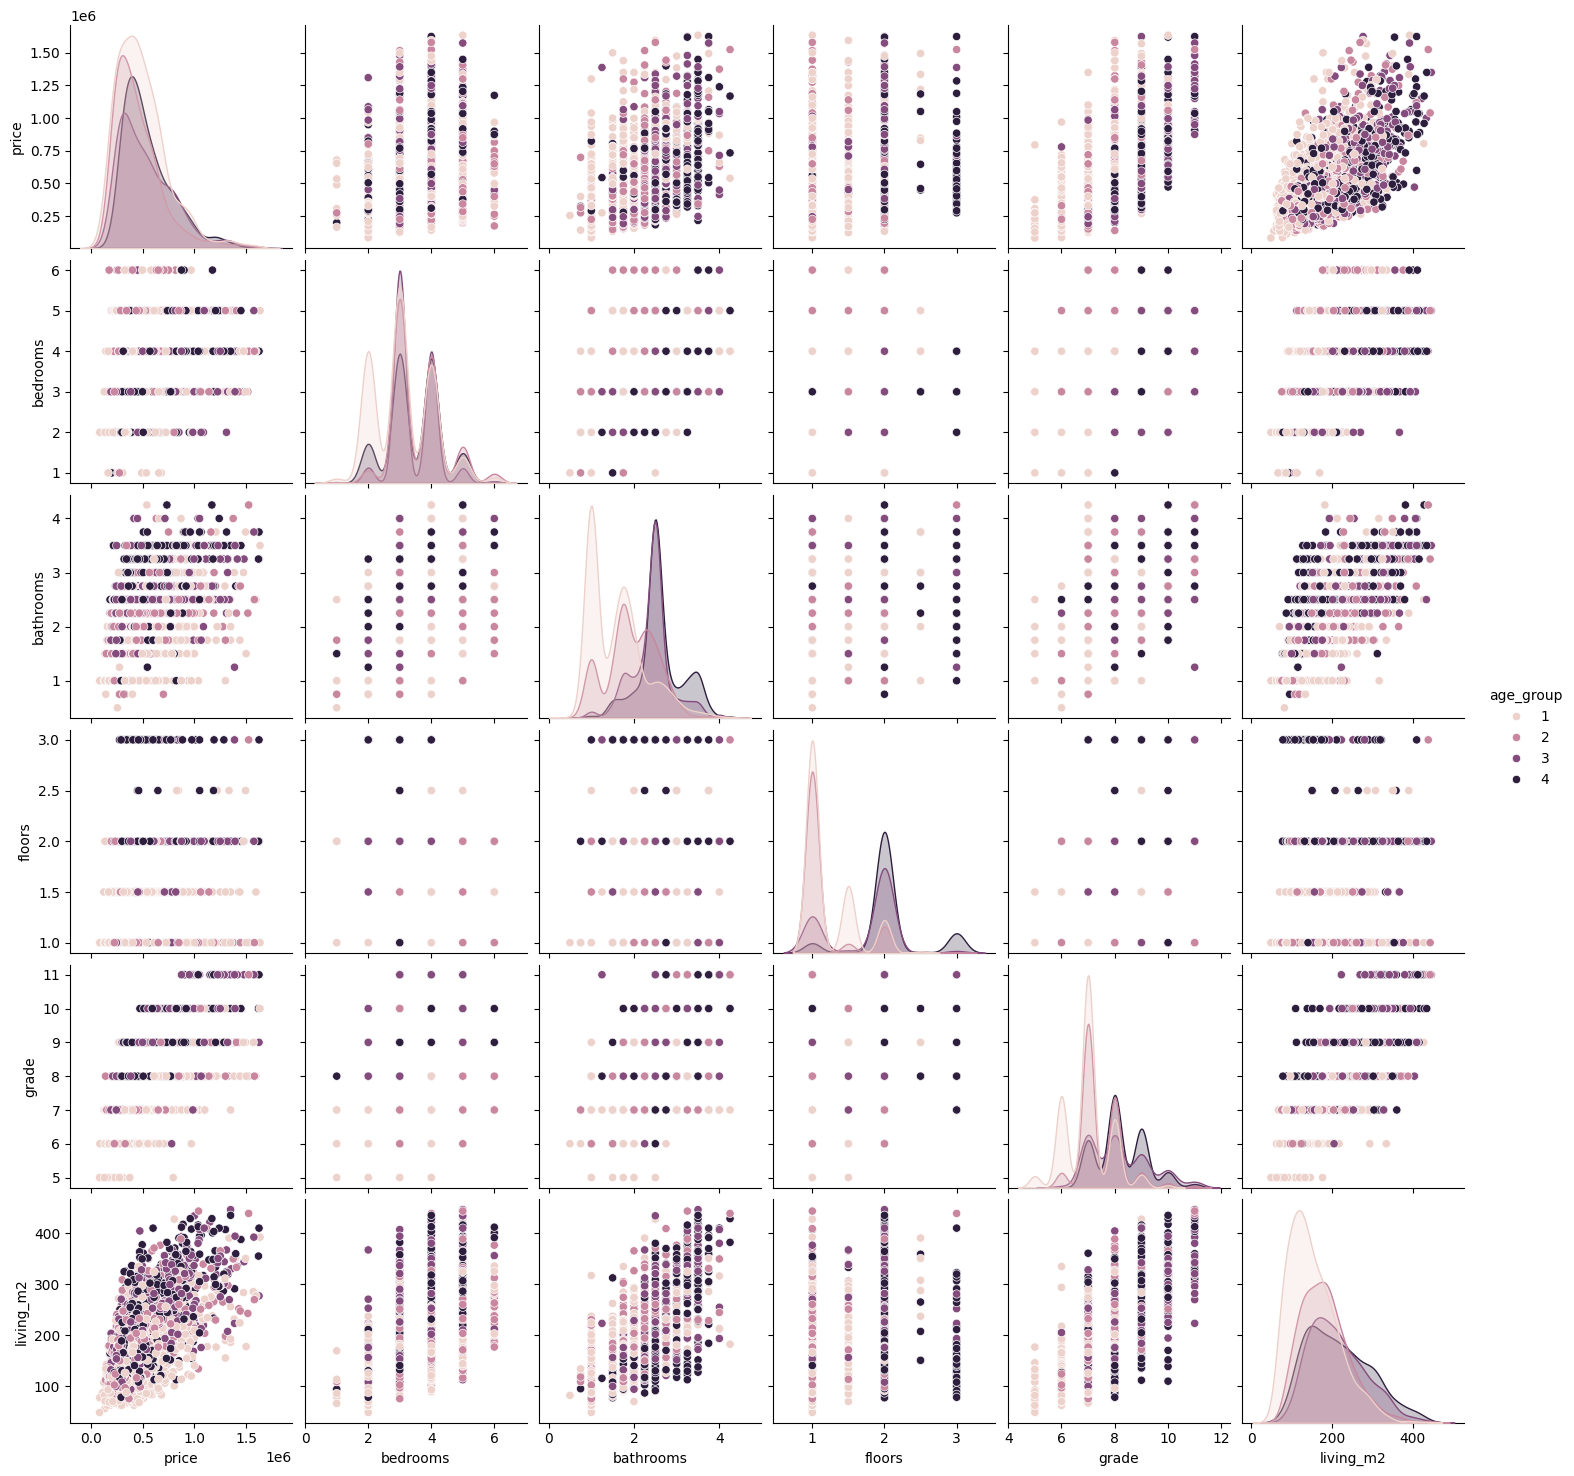

In [26]:
# Check quick correlation with pairplot
sns.pairplot(sample, hue="age_group")

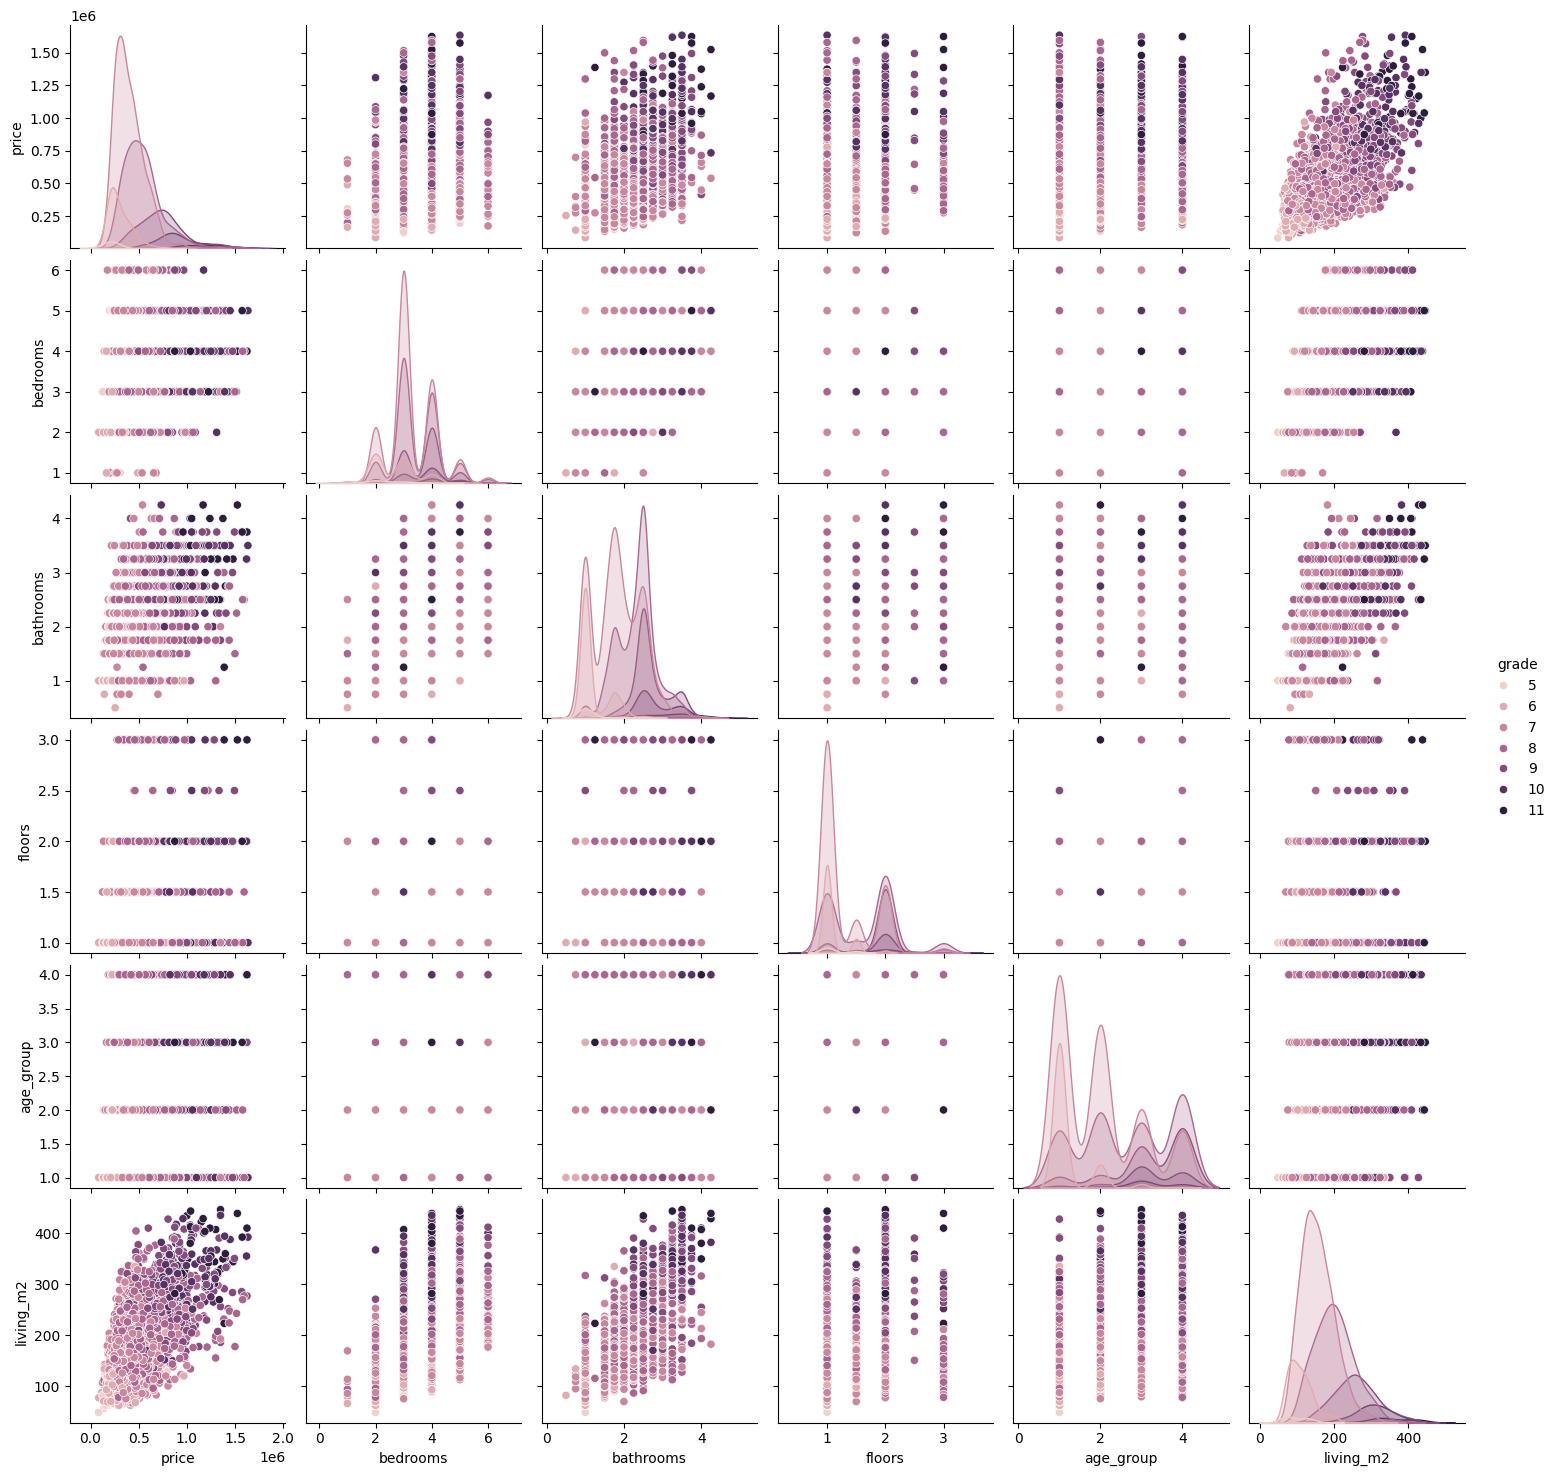

In [27]:
# Same as above, but with grade as hue
# We can see that price and grade and living_m2 corralate heavily
sns.pairplot(sample, hue="grade")

<Axes: xlabel='price', ylabel='Count'>

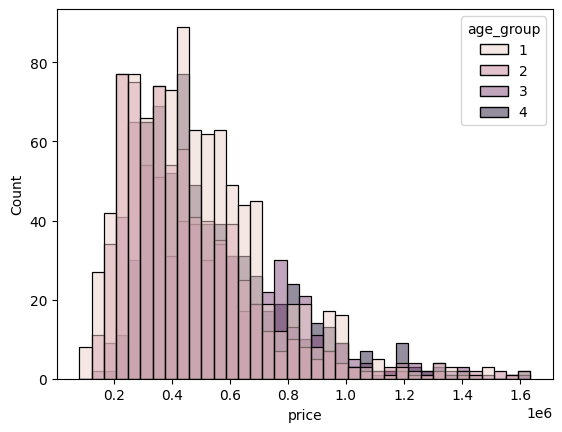

In [28]:
# Looks like there are buildings from all age groups in all price levels
sns.histplot(x="price", hue="age_group", data=sample)

<Axes: xlabel='living_m2', ylabel='price'>

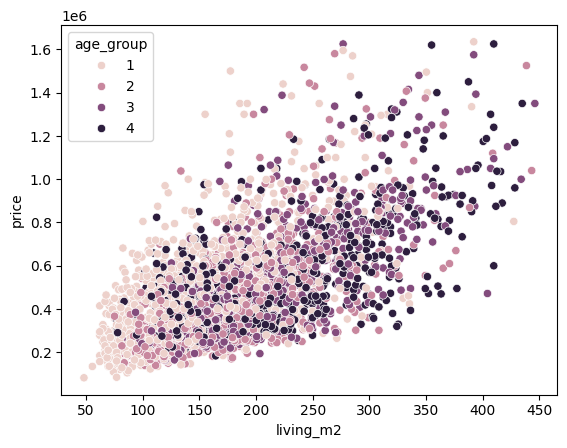

In [29]:
# Newer buildings seem to be bigger, doesn't affect the price directly
sns.scatterplot(data=sample, x="living_m2", y="price", hue="age_group")

<Axes: xlabel='living_m2', ylabel='price'>

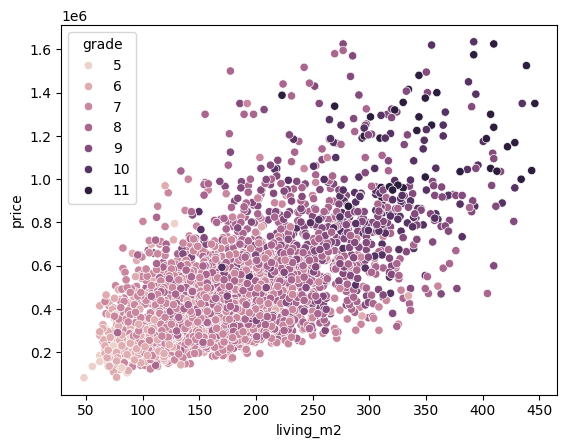

In [30]:
# This plot summarize how data works
# Price = grade + living_m2 (in most cases)
sns.scatterplot(data=sample, x="living_m2", y="price", hue="grade")

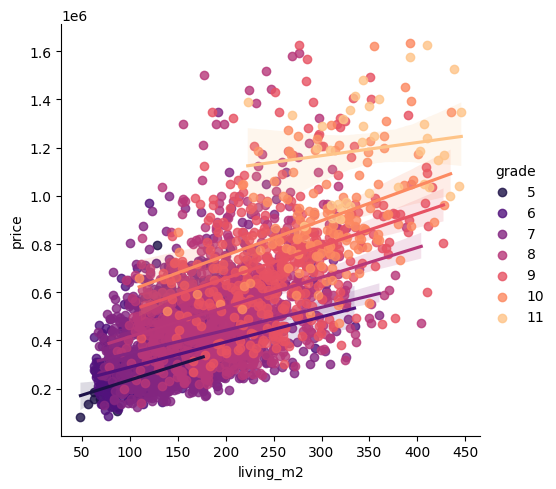

In [31]:
# With correlation
sns.lmplot(data=sample, x="living_m2", y="price", hue="grade", palette="magma")

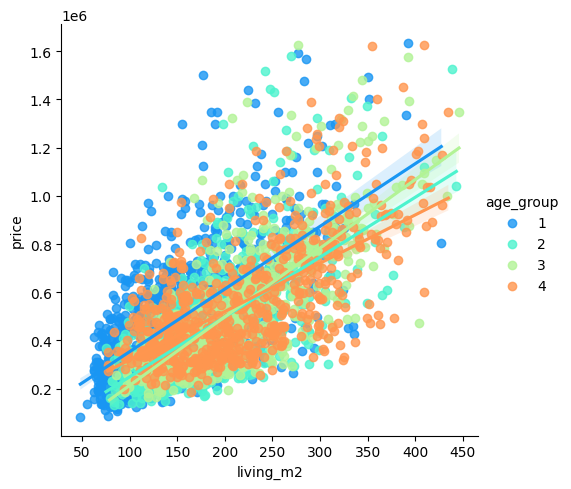

In [32]:
# Looks like age groups have same kind of correlations
# And there are all age groups in all price and living_m2
# So age is not that defining feature
sns.lmplot(x="living_m2", y="price", hue="age_group", data=sample, palette="rainbow")

**How bedrooms and bathrooms affect price?**

<Axes: xlabel='bathrooms', ylabel='price'>

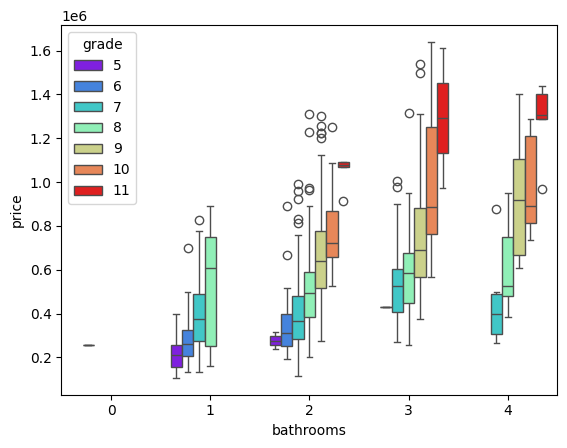

In [33]:
sample = df.sample(1000)
sample['bathrooms']= round(sample['bathrooms'], 0).astype(int)
sns.boxplot(data=sample, x="bathrooms", y="price", hue="grade", palette="rainbow")

# We can see that bathrooms affect the grade and therefore the price

<Axes: xlabel='bedrooms', ylabel='price'>

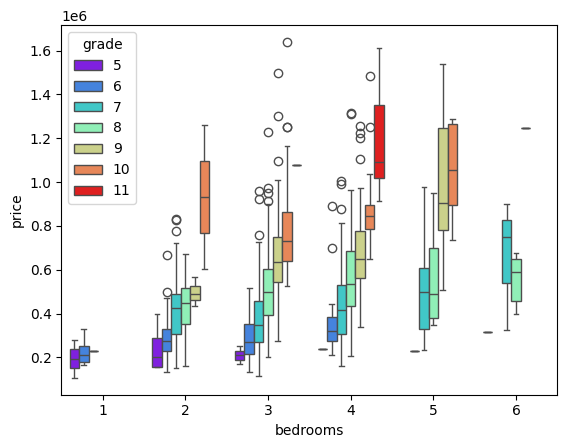

In [34]:
# Looks like number of bedrooms doesn't affect the price the way bathrooms does
sns.boxplot(data=sample, x="bedrooms", y="price", hue="grade", palette="rainbow")

#### Conclusion at this point:
- Price is defined mostly by **GRADE**
- Also largely by living m2
- Age group doesn't affect price directly, but newer houses have more living space (and therefore affects the pride indirectly)
- Bathrooms also seems to increase price (and grade)
- But surprisingly bedrooms don't increase the price directly